# Project: Sowing plan

**STMO**

2020-2021

Project by: Kirsten Van Huffel & Tristan Vanneste

## Outline

In this project, we will implement a sowing plan for a mixed culture of three types of crops. At our disposal, we have fifteen plots of land, to be planted using a limited supply of seeds. The different lots have varying soil compositions, influencing plant growth. Furthermore, some combinations of the crops grow well together; other combinations show competition. These aspects make for a challenging optimization problem!

In [1]:
n = 15;

## A model for plant growth

We have $n=15$ plots of land. The three types of plants are denoted with x, y, and z, respectively. Indices are used to indicate the amount of seed distributed to a particular plot, e.g., $x_i$ is the amount of seed assigned to the $i$-th plot. So this optimization problem can be solved in a $15\times 3=45$-dimensional space.

Small-capped variables indicate the amount of seed assigned to a field. Large-cap variables represent the corresponding yield of that field, i.e., $X_i$ is the yield (in kg) for field $i$. The yield for each type of seed can be computed using the following equations:

$$X_i = \frac{A_i^x x_i^2}{120 + x_i^2 + 2y_i - 0.8x_iz_i + z_i^2}\,,$$

$$Y_i = \frac{A_i^y y_i^2}{30 + 4x_i + y_i^2 + 7z_i}\,,$$

$$Z_i = \frac{A_i^z z_i^2}{80 + 0.4x_i^2 + 0.2x_iz_i +0.6y_i + z_i^2}\,.$$

Here, $A_i^x$, $A_i^y$, $A_i^z$ represent the maximum in yields in field $i$ for the different seed types. It depends on the amount of nitrogen $u_i$ and the water status $v_i$ of the soil. The following equation can be used to compute these coefficients:

$$\begin{bmatrix}
A_i^x \\
A_i^y\\
A_i^z
\end{bmatrix}
=
\begin{bmatrix}
4 & 2  \\
1 & 0.3 \\
-0.5 & 4
\end{bmatrix}
\begin{bmatrix}
u_i \\
v_j\\
\end{bmatrix}
+
\begin{bmatrix}
100 \\
300 \\
210
\end{bmatrix}\,.$$

In [2]:
S, b = [4 2; 1 0.3; -0.5 4], [100, 300, 210] ;  # soil effects

The growth model has several interesting facets:
- sowing more seed results in a larger yield, however, the effect saturates, increasing quantities have diminishing returns;
- the plants show competition;
- z positively influences x, while x negatively influences z (z produces nitrogen while x requires much nitrogen);
- y is a good producer but very sensitive to adverse conditions.

Below are the concentrations of nitrogen ($u$) and water status ($v$) for every field.

In [3]:
u = [36.6776, 36.9967, 83.033, 50.3725, 43.4616, 55.5842, 44.8919, 99.6519, 20.158, 102.325, 96.8896, 33.7957, 26.6129, 38.7194, 60.1461];

In [4]:
v = [34.5773,  24.3003,  24.3952,  28.462,  37.2912,  38.196,  36.4821,  30.1988,  20.9124,  35.207,  38.0924,  24.438,  28.3169,  20.3022,  24.8884];

The total amount of seed for every type is fixed by $c_x$, $c_y$, $c_z$:

In [5]:
cx, cy, cz = 250, 175, 325;

Finally, the yield for each crop can be sold at different prices (EUR/kg) $w_x$, $w_y$, $w_z$:

In [6]:
wx, wy, wz = 0.7, 0.85, 0.6;

So the objective is

$$f(\mathbf{x}, \mathbf{y}, \mathbf{z}) = \sum_{i=1}^{15}w_xX_i(x_i,y_i,z_i) + w_yY_i(x_i,y_i,z_i)+w_zZ_i(x_i,y_i,z_i)\,,$$

but the constraints are

$$\sum_{i=1}^{15} x_i \le c_x \quad\text{and}\quad x_i\geq 0\text{ for }i=1,\ldots,15\,,$$

$$\sum_{i=1}^{15} y_i \le c_y \quad\text{and}\quad y_i\geq 0\text{ for }i=1,\ldots,15\,,$$

$$\sum_{i=1}^{15} z_i \le c_z \quad\text{and}\quad z_i\geq 0\text{ for }i=1,\ldots,15\,.$$

Note: the sum constraints are inequalities because you don't need to use all the seed. However, the optimal solution will likely use all the available seed.

## An example

Let us compute the yield for plot 1 when we sow $x_1=10,y_1=6, z_1=8$. First, we compute the maximum yields, then the resulting concrete yields and, finally the value.

In [8]:
x1, y1, z1 = 10, 6, 8  # amount of seed per plot

(Ax1, Ay1, Az1) = S * [u[1], v[1]] .+ b # maximum yield

X1 = (Ax1 * x1^2) / (120 + x1^2 + 2y1 - 0.8x1 * z1 + z1^2) # yield for X1

Y1 = (Ay1 * y1^2) / (30 + 4x1 + y1^2 + 7z1) # yield for Y1

Z1 = (Az1 * z1^2) / (80 + 0.4x1 + 0.2x1*z1 +0.6y1 + z1^2) # yield for Z1

revenue_plot1 = wx * X1 + wy * Y1 + wz * Z1 # the yiels * revenue 

236.45994296256367

# Assignments

1. Give the formal optimization problem. Also provide the Lagrangian formulation.
2. Is the optimization problem of the optimal sowing plan concave? (since it is a maximization problem, I mean is minimizing the negative total revenue of a plan convex). You don't have to prove this formally, but you can make visual arguments. For a given field, make a the contour plots for (x,y), (x,z) and (y,z), always setting the third variable to 0.
3. Give a good/optimal sowing plan. You may solve this either using custom code or using a Julia package [Optim.jl](https://github.com/JuliaNLSolvers/Optim.jl), [Convex.jl](https://github.com/jump-dev/Convex.jl), or [JuMP.jl](https://github.com/jump-dev/JuMP.jl). Make plots of your solution and discuss it.
4. Given an optimal sowing plan found in the previous assignment, what is the price per kg for every seed you would be willing to buy, as to be break-even? How would you use this additional marginal quantity of seed. (HINT: you can obtain this from the Lagrangian).
5. Provide three alternative solutions, each in which you only use one of the types of seed, e.g. $\max_\mathbf{x}f(\mathbf{x}, 0, 0)$. Show and discuss the difference.

## Submission

Hand in the solved Jupyter notebook by **14 November 2020**. Send your notebook to [me](michiel.stock@ugent.be) both as Pluto notebook file (.jl) and as **PDF or HTML file**. Hand in a CSV file with your best **valid** solution for question 3. In this file, every row is a plot of land and the three columns represent x, y, z, respectively.


In [7]:
# loading packages 
using Plots
using LinearAlgebra
using STMO
import STMO.TestFuns: fquadr, grad_fquadr, hess_fquadr
import STMO.TestFuns: fnonquadr, grad_fnonquadr, hess_fnonquadr

### 1. Formal description of the problem

We want to maximize the total profit of the 15 plots. By minimizing the negative profit, we obtain the following objective function that has a minimizer representing the maximal profit:

$$f(\mathbf{x}, \mathbf{y}, \mathbf{z}) = -\sum_{i=1}^{15}(w_xX_i(x_i,y_i,z_i) + w_yY_i(x_i,y_i,z_i)+w_zZ_i(x_i,y_i,z_i))\,,$$

subject to the set of the following simplified constraints (because the optimal solution will likely use all of the seeds, we reformed the inequality constraints for the maximum amount of seeds for each crop to equality constraints.)

$$\sum_{i=1}^{15} x_i = 250 \quad\text{and}\quad x_i\geq 0\text{ for }i=1,\ldots,15\,,$$

$$\sum_{i=1}^{15} y_i = 175 \quad\text{and}\quad y_i\geq 0\text{ for }i=1,\ldots,15\,,$$

$$\sum_{i=1}^{15} z_i = 325 \quad\text{and}\quad z_i\geq 0\text{ for }i=1,\ldots,15\,.$$

The Lagrangian formulation then becomes:
 
$$L(\mathbf{x},\mathbf{y},\mathbf{z},\mathbf{\nu}) = -\sum_{i=1}^{15}(w_xX_i(x_i,y_i,z_i) + w_yY_i(x_i,y_i,z_i)+w_zZ_i(x_i,y_i,z_i))\ +\mathbf{\nu} * $$

with $\mathbf{\nu}$ the vector with lagrangian multipliers and * the constraints. The fully expanded expression then becomes:  

$$L(\mathbf{x},\mathbf{y},\mathbf{z},\mathbf{\nu}) = -\sum_{i=1}^{15}w_xX_i(x_i,y_i,z_i) + w_yY_i(x_i,y_i,z_i)+w_zZ_i(x_i,y_i,z_i)\ + \nu_1 *( \sum_{i=1}^{15} x_i - 250) + \nu_2 *( \sum_{i=1}^{15} y_i - 175) + \nu_3 * (\sum_{i=1}^{15} z_i - 325 ) $$

$$+ \sum_{i=1}^{15} (-\nu_{i+3} *x_i + -\nu_{i+18}*y_i + -\nu_{i+33}*z_i) $$ 



### 2. Convexity 
#### 2.1 Define objective function to optimize revenue of all fields

In [8]:
function totalobjectivefunction(xvector,yvector,zvector)
    revenue_plot= fill(0.0, size(xvector, 1))
    for i in 1:size(xvector, 1) # this is going to be 15 for the 15 plots
        x = xvector[i]
        y = yvector[i]
        z = zvector[i]
        #maximum yields in function of amount of nitrogen and water 
        (Ax, Ay, Az) = S * [u[i], v[i]] .+ b 
        # calculating the yields
        X = (Ax * x^2) / (120 + x^2 + 2y - 0.8x * z + z^2)
        Y = (Ay * y^2) / (30 + 4x + y^2 + 7z)
        Z = (Az * z^2) / (80 + 0.4x + 0.2x*z +0.6y + z^2)
        # calculting the revenue 
        revenue_plot[i] = wx * X + wy * Y + wz * Z
    end
    revenue = -sum(revenue_plot) # this minus is bcs we need to find the minimum with our methods and not the max
    return revenue
end

totalobjectivefunction (generic function with 1 method)

#### 2.2 Define objective function that represents the yield of one specific field

In [12]:
function onefieldobjectivefunction(xvector,yvector,zvector, field)
     revenue_plot= fill(0.0, size(xvector, 1))
     x = xvector 
     y = yvector 
     z = zvector 
     (Ax, Ay, Az) = S * [u[field], v[field]] .+ b
     X = (Ax * x^2) / (120 + x^2 + 2y - 0.8x * z + z^2)
     Y = (Ay * y^2) / (30 + 4x + y^2 + 7z)
     Z = (Az * z^2) / (80 + 0.4x + 0.2x*z +0.6y + z^2)
     revenue_plot = wx * X + wy * Y + wz * Z           
     return -sum(revenue_plot)
end

onefieldobjectivefunction (generic function with 1 method)

#### 2.3 Contour plots

In [148]:
# import Pkg; Pkg.add("matplotlib")

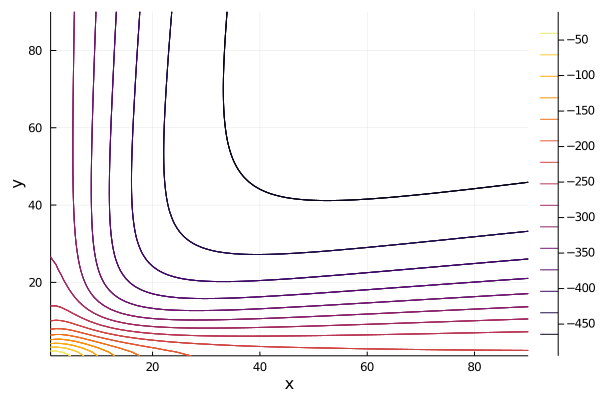

In [154]:
x = 1:90
y = 1:90
z = 1:90
contour!(x,y,(x,y)->totalobjectivefunction(x,y,0), xlabel=:x, ylabel=:y)

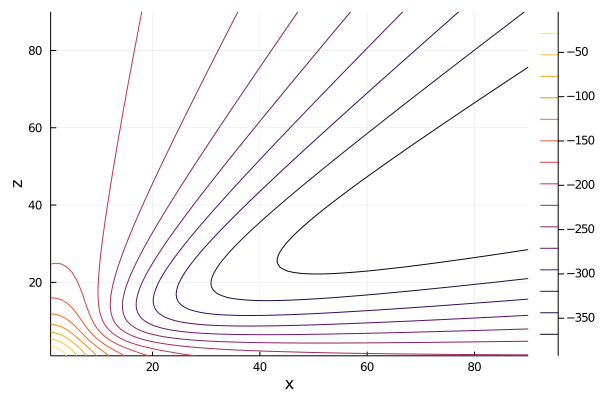

In [140]:
contour(x,z,(x,z)->totalobjectivefunction(x,0,z), xlabel=:x, ylabel=:z)

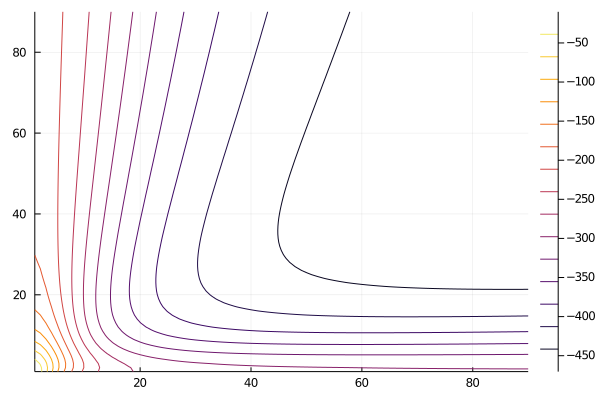

In [141]:
contour(y,z,(y,z)->totalobjectivefunction(0,y,z))

#### 2.4 Discussion

This optimization problem is not convex, since you can drawn a line connecting two dots on a specific contour line that will cut that contour line (the function is not entirely underneath the line).

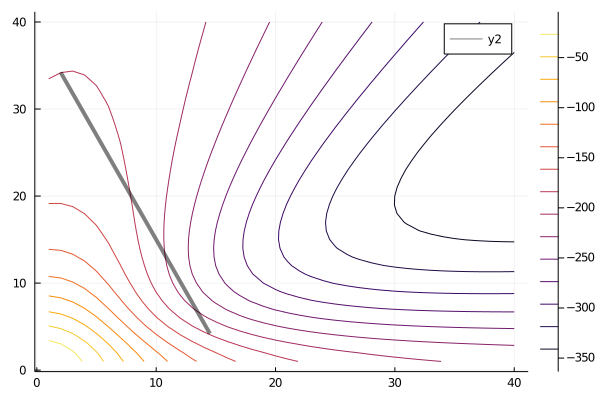

In [225]:
x = 1:40
y = 1:40
z = 1:40
contour(x,z,(x,z)->totalobjectivefunction(x,0,z))

xline = 2:0.5:14.5
plot!(xline,(-2.4*xline .+ 39), line = (:black, 4, 0.5))

### 3. Making a sowing plan

Here, you have the space to solve the problem. Save your final solution in the variable `solution` and save it in a csv file using `save_solution`. This is done automatically when your name is filled in.

#### 3.1 Look for optimal solution

In [55]:
# import Pkg; Pkg.add("Ipopt")
# import Pkg;Pkg.add("JuMP")

In [9]:
using JuMP
using Ipopt

In [10]:
model = Model(Ipopt.Optimizer) 
set_optimizer_attributes(model, "print_level" => 0)
@variable(model, x[1:15] >= 0)
@variable(model, y[1:15] >= 0)
@variable(model, z[1:15] >= 0)
 
@constraint(model, sum(x[i] for i in 1:15) == cx-0.00001)
@constraint(model, sum(y[i] for i in 1:15) == cy-0.00001)
@constraint(model, sum(z[i] for i in 1:15) == cz-0.00001)

Ax = fill(0.0, 15)
Ay = fill(0.0, 15)
Az = fill(0.0, 15)
for i in 1:15
    (Ax[i], Ay[i], Az[i]) = S * [u[i], v[i]] .+ b
end 

 

@NLobjective(model, Min, -sum(wx * (Ax[i] * x[i]^2) / (120 + x[i]^2 + 2y[i] - 0.8x[i] * z[i] + z[i]^2) 
        + wy * (Ay[i] * y[i]^2) / (30 + 4x[i] + y[i]^2 + 7z[i])
        + wz * (Az[i] * z[i]^2) / (80 + 0.4x[i] + 0.2x[i]*z[i] +0.6y[i] + z[i]^2) for i in 1:15))

optimize!(model)

optimalobjective = @show objective_value(model);
xoptimal = value.(x);
yoptimal = value.(y);
zoptimal = value.(z);
 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

objective_value(model) = -6435.4137878617385


In [212]:
# Display solution
using DataFrames
revenueoptimal=-optimalobjective 
@show df=DataFrame(x_optimal=xoptimal, y_optimal=yoptimal, z_optimal=zoptimal, nitrogen=u,H2O=v); 
@show revenueoptimal;

df = DataFrame(x_optimal = xoptimal, y_optimal = yoptimal, z_optimal = zoptimal, nitrogen = u, H2O = v) = 15×5 DataFrame
│ Row │ x_optimal │ y_optimal │ z_optimal │ nitrogen │ H2O     │
│     │ Float64   │ Float64   │ Float64   │ Float64  │ Float64 │
├─────┼───────────┼───────────┼───────────┼──────────┼─────────┤
│ 1   │ 20.12     │ 12.5476   │ 13.2257   │ 36.6776  │ 34.5773 │
│ 2   │ 0.0       │ 13.3597   │ 17.6007   │ 36.9967  │ 24.3003 │
│ 3   │ 24.0582   │ 14.0591   │ 12.2472   │ 83.033   │ 24.3952 │
│ 4   │ 21.2428   │ 12.9986   │ 12.5985   │ 50.3725  │ 28.462  │
│ 5   │ 21.2674   │ 12.7863   │ 13.3798   │ 43.4616  │ 37.2912 │
│ 6   │ 22.7005   │ 13.2149   │ 13.3733   │ 55.5842  │ 38.196  │
│ 7   │ 21.3632   │ 12.8345   │ 13.3031   │ 44.8919  │ 36.4821 │
│ 8   │ 25.8154   │ 14.6424   │ 12.7638   │ 99.6519  │ 30.1988 │
│ 9   │ 0.0       │ 0.0       │ 72.9157   │ 20.158   │ 20.9124 │
│ 10  │ 26.3801   │ 14.7714   │ 13.1439   │ 102.325  │ 35.207  │
│ 11  │ 26.2046   │ 14.6191   │ 13

In [74]:
# check constraints
sum(xoptimal), sum(yoptimal), sum(zoptimal)

(249.9999900384292, 174.99999001953177, 324.99999)

In [75]:
# check objective value
totalobjectivefunction(xoptimal, yoptimal, zoptimal)

-6435.413787789905

#### 3.2 Discussion 

We see that there is a balance between the optimal amount of seeds of crop x and z in a relation of approximately 2:1. 
This confirms the statement that z has a positive influence on x but not reversed. 
It was also stated that the crop y is sensitive to environmental conditions and we can confirm this by looking at the output of our minimizer.

For plots like 9 and 13 there is not a lot of H2O and nitrogen so it makes sense that crop x and y are not growing on these plots. Crop z  produces nitrogen and can thus grow in the nitrogen limiting conditions. The absent of nitrogen has a postive influence on the growth of z, as can be seen in the output of our minimizer (plot 9). Crop y has a negative effect of the presents of crop z and x (as can be seen in the denominator of your yields for Yi). Crop y has the highest yield for a low amount of nitrogen and H2O (see matrix for computing the maximum yields) but crop x has higher potential to have higher yields with increasing amounts of nitrogen and H2O. 

It is not beneficial to sow a lot of seed y on plots 9 and 13 because the nitrogen and water content is too low there (from matrix for calculating maximal yield of crops on the plots it can be seen that y does not grow well on  low nitrogen and water soils).

In [12]:
#It also makes sense to not grow your most yielding crops (x and y) on the worse plots because 
# you want the highest yield from these. --> klopt niet: volgens maximal yield matrix, zijn z en y beste
# ik had het over de winst per kg wx, wy, wz = 0.7, 0.85, 0.6;

#### 3.3 Save solution

In [69]:
solution = convert(Matrix, df[:,1:3]);

Check if the solution is valid.

In [63]:
function isvalidsolution(solution::Matrix)
	return size(solution) == (15, 3) && all(solution .≥ 0.0) && all(sum(solution, dims=1) .≤ [cx cy cz])
end

isvalidsolution (generic function with 1 method)

In [64]:
isvalidsolution(solution)

true

Save the solution.

In [66]:
using CSV
function save_solution(fname, solution::Matrix)
	@assert isvalidsolution(solution) "Oh no, your solution is invalid!"
	CSV.write(fname, DataFrame(solution))
end

save_solution (generic function with 1 method)

In [67]:
save_solution("solution_TristanVanneste_KirstenVanHuffel.csv", solution)

"solution_TristanVanneste_KirstenVanHuffel.csv"

#### 3.4 Plot solution
Solutions are plotted for field 1, 2 and 9.

In [79]:
x=0:1:90 
y=0:1:90 
z=0:1:90

0:1:90

##### 3.4.1 Plot 1: solution (x1_optimal, y1_optimal, z1_optimal) is plotted on (x,y), (x,z) and (y,z) plot

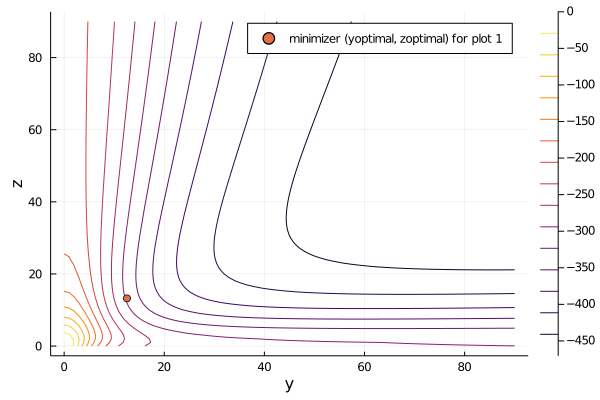

In [97]:
contour(y,z, (y,z)->onefieldobjectivefunction(0,y,z, 1), xlabel=:y, ylabel=:z)
plot!([yoptimal[1]], [zoptimal[1]], seriestype = :scatter, label=:"minimizer (yoptimal, zoptimal) for plot 1")

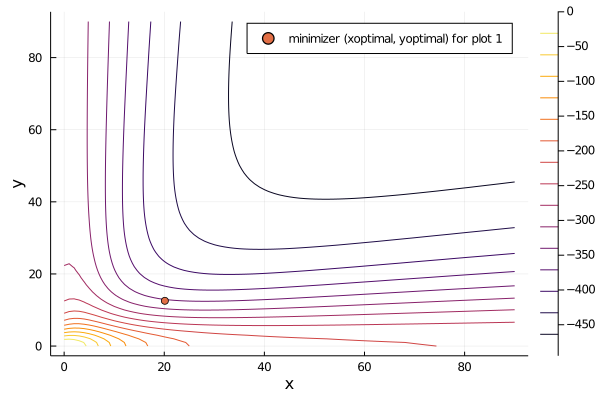

In [96]:
contour(x,y, (x,y)->onefieldobjectivefunction(x,y,0,1), xlabel=:x, ylabel=:y)
plot!([xoptimal[1]], [yoptimal[1]], seriestype = :scatter, label=:"minimizer (xoptimal, yoptimal) for plot 1")

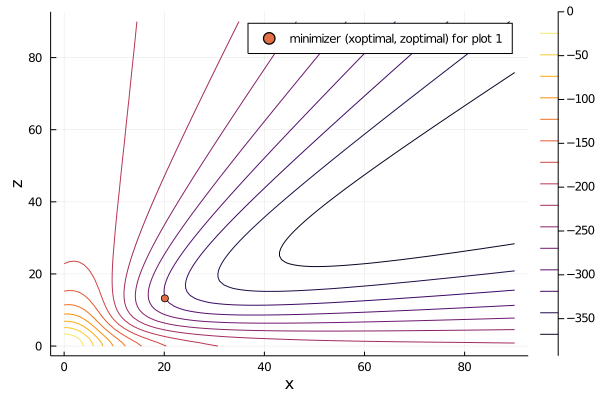

In [95]:
contour(x,z, (x,z)->onefieldobjectivefunction(x,0,z,1), xlabel=:x, ylabel=:z)
plot!([xoptimal[1]], [zoptimal[1]], seriestype = :scatter, label=:"minimizer (xoptimal, zoptimal) for plot 1")

##### 3.4.1 Plot 2: solution (x2_optimal, y2_optimal, z2_optimal) is plotted on (x,y), (x,z) and (y,z) plot

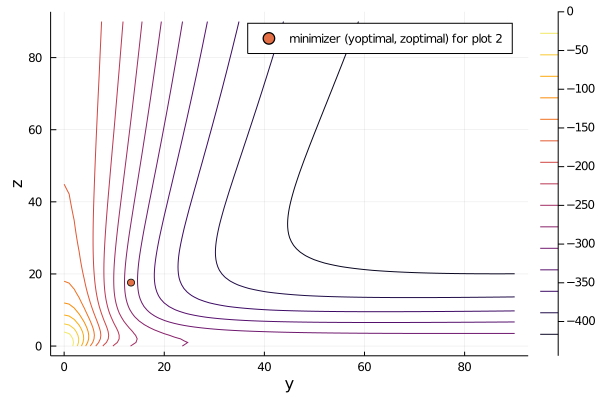

In [94]:
contour(y,z, (y,z)->onefieldobjectivefunction(0,y,z,2), xlabel=:y, ylabel=:z)
plot!([yoptimal[2]], [zoptimal[2]], seriestype = :scatter, label=:"minimizer (yoptimal, zoptimal) for plot 2")

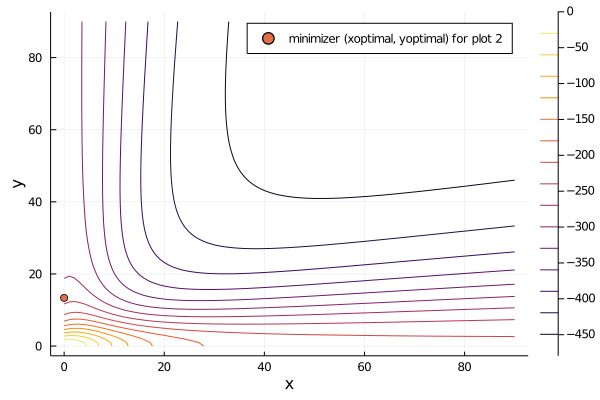

In [92]:
contour(x,y, (x,y)->onefieldobjectivefunction(x,y,0,2), xlabel=:x, ylabel=:y)
plot!([xoptimal[2]], [yoptimal[2]], seriestype = :scatter, label=:"minimizer (xoptimal, yoptimal) for plot 2")

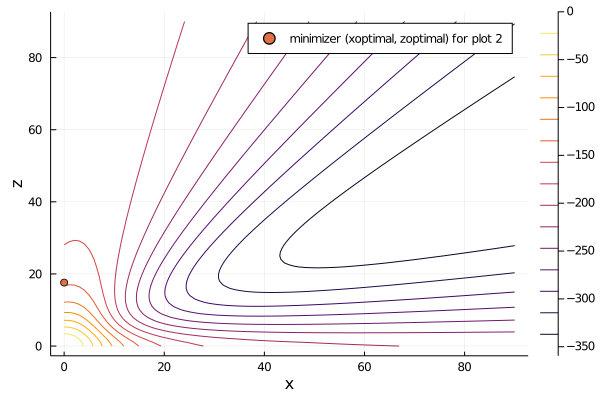

In [91]:
contour(x,z, (x,z)->onefieldobjectivefunction(x,0,z,2), xlabel=:x, ylabel=:z)
plot!([xoptimal[2]], [zoptimal[2]], seriestype = :scatter, label=:"minimizer (xoptimal, zoptimal) for plot 2")

##### 3.4.1 Plot 9: solution (x9_optimal, y9_optimal, z9_optimal) is plotted on (x,y), (x,z) and (y,z) plot

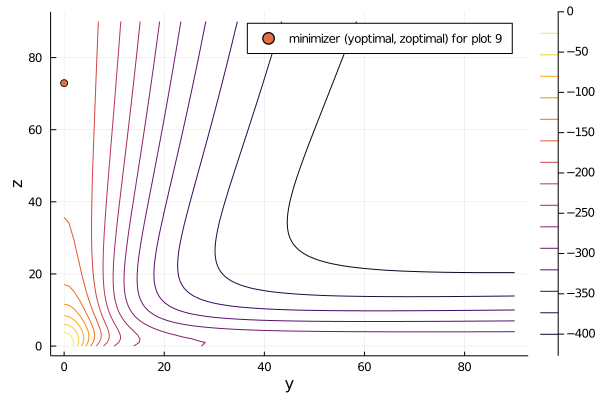

In [90]:
contour(y,z, (y,z)->onefieldobjectivefunction(0,y,z,9), xlabel=:y, ylabel=:z)
plot!([yoptimal[9]], [zoptimal[9]], seriestype = :scatter, label=:"minimizer (yoptimal, zoptimal) for plot 9")

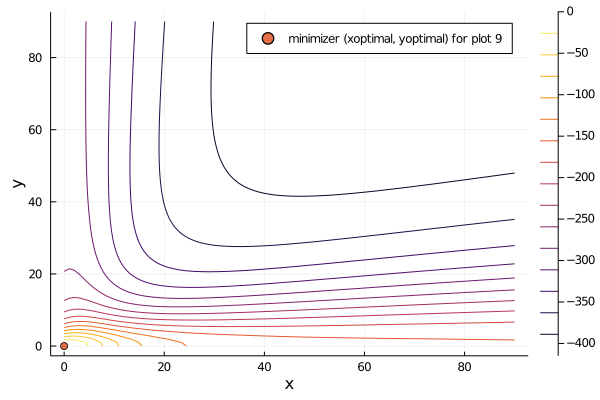

In [89]:
contour(x,y, (x,y)->onefieldobjectivefunction(x,y,0,9), xlabel=:x, ylabel=:y)
plot!([xoptimal[9]], [yoptimal[9]], seriestype = :scatter, label=:"minimizer (xoptimal, yoptimal) for plot 9")

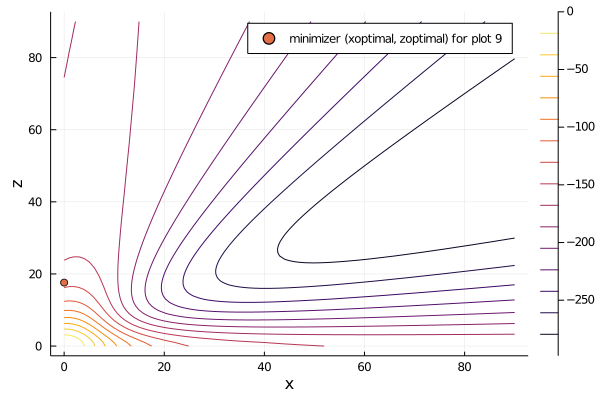

In [88]:
contour(x,z, (x,z)->onefieldobjectivefunction(x,0,z,9), xlabel=:x, ylabel=:z)
plot!([xoptimal[2]], [zoptimal[2]], seriestype = :scatter, label=:"minimizer (xoptimal, zoptimal) for plot 9")

### 4. Price of seed

#### 4.1 Marginal additional cost for x

In [99]:
model = Model(Ipopt.Optimizer)
set_optimizer_attributes(model, "print_level" => 0)

@variable(model, x[1:15] >= 0)
@variable(model, y[1:15] >= 0)
@variable(model, z[1:15] >= 0)
 
@constraint(model, sum(x[i] for i in 1:15) == cx+1)
@constraint(model, sum(y[i] for i in 1:15) == cy)
@constraint(model, sum(z[i] for i in 1:15) == cz)

Ax = fill(0.0, 15)
Ay = fill(0.0, 15)
Az = fill(0.0, 15)
for i in 1:15
    (Ax[i], Ay[i], Az[i]) = S * [u[i], v[i]] .+ b
end 

 

@NLobjective(model, Min, -sum(wx * (Ax[i] * x[i]^2) / (120 + x[i]^2 + 2y[i] - 0.8x[i] * z[i] + z[i]^2) 
        + wy * (Ay[i] * y[i]^2) / (30 + 4x[i] + y[i]^2 + 7z[i])
        + wz * (Az[i] * z[i]^2) / (80 + 0.4x[i] + 0.2x[i]*z[i] +0.6y[i] + z[i]^2) for i in 1:15))

optimize!(model)

optimalobjective_extrax = @show objective_value(model);
xoptimal = value.(x);
yoptimal = value.(y);
zoptimal = value.(z);
 

objective_value(model) = -6440.205652130441


In [100]:
print("Marginal additional cost for seed x: ", -optimalobjective_extrax+optimalobjective, " euro/kg")

Marginal additional cost for seed x: 4.791864268702739 euro/kg

#### 4.2 Marginal additional cost for y

In [105]:
model = Model(Ipopt.Optimizer) 
set_optimizer_attributes(model, "print_level" => 0)

@variable(model, x[1:15] >= 0)
@variable(model, y[1:15] >= 0)
@variable(model, z[1:15] >= 0)
 
@constraint(model, sum(x[i] for i in 1:15) == cx)
@constraint(model, sum(y[i] for i in 1:15) == cy+1)
@constraint(model, sum(z[i] for i in 1:15) == cz)

Ax = fill(0.0, 15)
Ay = fill(0.0, 15)
Az = fill(0.0, 15)
for i in 1:15
    (Ax[i], Ay[i], Az[i]) = S * [u[i], v[i]] .+ b
end 

 

@NLobjective(model, Min, -sum(wx * (Ax[i] * x[i]^2) / (120 + x[i]^2 + 2y[i] - 0.8x[i] * z[i] + z[i]^2) 
        + wy * (Ay[i] * y[i]^2) / (30 + 4x[i] + y[i]^2 + 7z[i])
        + wz * (Az[i] * z[i]^2) / (80 + 0.4x[i] + 0.2x[i]*z[i] +0.6y[i] + z[i]^2) for i in 1:15))

optimize!(model)

optimalobjective_extray = objective_value(model);
xoptimal = value.(x);
yoptimal = value.(y);
zoptimal = value.(z);
 

In [106]:
print("Marginal additional cost for seed x: ", -optimalobjective_extray+optimalobjective, " euro/kg")

Marginal additional cost for seed x: 10.65661017443108 euro/kg

#### 4.3 Marginal additional cost for z

In [109]:
model = Model(Ipopt.Optimizer) 
set_optimizer_attributes(model, "print_level" => 0)

@variable(model, x[1:15] >= 0)
@variable(model, y[1:15] >= 0)
@variable(model, z[1:15] >= 0)
 
@constraint(model, sum(x[i] for i in 1:15) == cx)
@constraint(model, sum(y[i] for i in 1:15) == cy)
@constraint(model, sum(z[i] for i in 1:15) == cz+1)

Ax = fill(0.0, 15)
Ay = fill(0.0, 15)
Az = fill(0.0, 15)
for i in 1:15
    (Ax[i], Ay[i], Az[i]) = S * [u[i], v[i]] .+ b
end 

 

@NLobjective(model, Min, -sum(wx * (Ax[i] * x[i]^2) / (120 + x[i]^2 + 2y[i] - 0.8x[i] * z[i] + z[i]^2) 
        + wy * (Ay[i] * y[i]^2) / (30 + 4x[i] + y[i]^2 + 7z[i])
        + wz * (Az[i] * z[i]^2) / (80 + 0.4x[i] + 0.2x[i]*z[i] +0.6y[i] + z[i]^2) for i in 1:15))

optimize!(model)

optimalobjective_extraz = objective_value(model);
xoptimal = value.(x);
yoptimal = value.(y);
zoptimal = value.(z);
 

In [110]:
print("Marginal additional cost for seed x: ", -optimalobjective_extraz+optimalobjective, " euro/kg")

Marginal additional cost for seed x: 0.06765422994340042 euro/kg

#### 4.4 Discussion

The maximum price for an additional kg of crop x we are willing to pay as to be break-even is 4.79 euro. If the price on the market is higher, there is loss, while if the price is lower than 4.79 euro/kg we gain a profit = 4.79 euro/kg - the actual price.

The maximum price for an additional kg of crop y we are willing to pay as to be break-even is 10.66 euro. If the price on the market is higher, there is loss, while if the price is lower than 10.66 euro/kg we gain a profit = 10.66 euro/kg - the actual price.

The maximum price for an additional kg of crop y we are willing to pay as to be break-even is 0.07 euro. If the price on the market is higher, there is loss, while if the price is lower than 0.07 euro/kg we gain a profit = 0.07 euro/kg - the actual price.

So, we are willing to pay the most for an additional kg of seed y, because this will result in the highest gain in profit. An additional kg of crop z is worth the least.



### 5. One type of seed

Make three solutions in which you only use one type of seed. Analyse your solutions!

#### 5.1 Optimal solution when only using cx kg of crop x

In [40]:
# for only x 

model = Model(Ipopt.Optimizer) 
set_optimizer_attributes(model, "print_level" => 0)

@variable(model, x[1:15] >= 0)
@variable(model, y[1:15] == 0)
@variable(model, z[1:15] == 0)
 

@constraint(model, sum(x[i] for i in 1:15) == cx)


Ax = fill(0.0, 15)
Ay = fill(0.0, 15)
Az = fill(0.0, 15)
for i in 1:15
    (Ax[i], Ay[i], Az[i]) = S * [u[i], v[i]] .+ b
end 

 

@NLobjective(model, Min, -sum(wx * (Ax[i] * x[i]^2) / (120 + x[i]^2 + 2y[i] - 0.8x[i] * z[i] + z[i]^2) 
        + wy * (Ay[i] * y[i]^2) / (30 + 4x[i] + y[i]^2 + 7z[i])
        + wz * (Az[i] * z[i]^2) / (80 + 0.4x[i] + 0.2x[i]*z[i] +0.6y[i] + z[i]^2) for i in 1:15))

optimize!(model)


optimalobjective_onlyx = @show objective_value(model);
xoptimal_onlyx = value.(x);
yoptimal_onlyx = value.(y);
zoptimal_onlyx = value.(z);
 

objective_value(model) = -2828.6185986611854


In [41]:
using DataFrames
revenueoptimal_onlyx=-optimalobjective_onlyx
@show DataFrame(x_optimal=xoptimal_onlyx, y_optimal=yoptimal_onlyx, z_optimal=zoptimal_onlyx,nitrogen=u,H2O=v);
@show revenueoptimal_onlyx;
@show sum(xoptimal_onlyx);

DataFrame(x_optimal = xoptimal_onlyx, y_optimal = yoptimal_onlyx, z_optimal = zoptimal_onlyx, nitrogen = u, H2O = v) = 15×5 DataFrame
│ Row │ x_optimal │ y_optimal │ z_optimal │ nitrogen │ H2O     │
│     │ Float64   │ Float64   │ Float64   │ Float64  │ Float64 │
├─────┼───────────┼───────────┼───────────┼──────────┼─────────┤
│ 1   │ 15.3024   │ 0.0       │ 0.0       │ 36.6776  │ 34.5773 │
│ 2   │ 14.7152   │ 0.0       │ 0.0       │ 36.9967  │ 24.3003 │
│ 3   │ 19.2338   │ 0.0       │ 0.0       │ 83.033   │ 24.3952 │
│ 4   │ 16.4762   │ 0.0       │ 0.0       │ 50.3725  │ 28.462  │
│ 5   │ 16.2139   │ 0.0       │ 0.0       │ 43.4616  │ 37.2912 │
│ 6   │ 17.4684   │ 0.0       │ 0.0       │ 55.5842  │ 38.196  │
│ 7   │ 16.3225   │ 0.0       │ 0.0       │ 44.8919  │ 36.4821 │
│ 8   │ 20.6819   │ 0.0       │ 0.0       │ 99.6519  │ 30.1988 │
│ 9   │ 11.9383   │ 0.0       │ 0.0       │ 20.158   │ 20.9124 │
│ 10  │ 21.0373   │ 0.0       │ 0.0       │ 102.325  │ 35.207  │
│ 11  │ 20.7642   │ 0

#### 5.2 Optimal solution when only using cy kg of crop y

In [15]:
# for only y 

model = Model(Ipopt.Optimizer) 
set_optimizer_attributes(model, "print_level" => 0)

@variable(model, x[1:15] == 0)
@variable(model, y[1:15] >= 0)
@variable(model, z[1:15] == 0)
 

@constraint(model, sum(y[i] for i in 1:15) == cy)

Ax = fill(0.0, 15)
Ay = fill(0.0, 15)
Az = fill(0.0, 15)
for i in 1:15
    (Ax[i], Ay[i], Az[i]) = S * [u[i], v[i]] .+ b
end 

 

@NLobjective(model, Min, -sum(wx * (Ax[i] * x[i]^2) / (120 + x[i]^2 + 2y[i] - 0.8x[i] * z[i] + z[i]^2) 
        + wy * (Ay[i] * y[i]^2) / (30 + 4x[i] + y[i]^2 + 7z[i])
        + wz * (Az[i] * z[i]^2) / (80 + 0.4x[i] + 0.2x[i]*z[i] +0.6y[i] + z[i]^2) for i in 1:15))

optimize!(model)
       
optimalobjective_onlyy = @show objective_value(model);
xoptimal_onlyy = value.(x);
yoptimal_onlyy = value.(y);
zoptimal_onlyy = value.(z);
 

objective_value(model) = -3806.6447672835025


In [16]:
using DataFrames
revenueoptimal_onlyy=-optimalobjective_onlyy
@show DataFrame(x_optimal=xoptimal_onlyy, y_optimal=yoptimal_onlyy, z_optimal=zoptimal_onlyy, nitrogen = n,H2O=v);
@show revenueoptimal_onlyy;
@show sum(yoptimal_onlyy);

DataFrame(x_optimal = xoptimal_onlyy, y_optimal = yoptimal_onlyy, z_optimal = zoptimal_onlyy, nitrogen = n, H2O = v) = 15×5 DataFrame
│ Row │ x_optimal │ y_optimal │ z_optimal │ nitrogen │ H2O     │
│     │ Float64   │ Float64   │ Float64   │ Int64    │ Float64 │
├─────┼───────────┼───────────┼───────────┼──────────┼─────────┤
│ 1   │ 0.0       │ 11.4316   │ 0.0       │ 15       │ 34.5773 │
│ 2   │ 0.0       │ 11.391    │ 0.0       │ 15       │ 24.3003 │
│ 3   │ 0.0       │ 12.0355   │ 0.0       │ 15       │ 24.3952 │
│ 4   │ 0.0       │ 11.6026   │ 0.0       │ 15       │ 28.462  │
│ 5   │ 0.0       │ 11.5417   │ 0.0       │ 15       │ 37.2912 │
│ 6   │ 0.0       │ 11.7174   │ 0.0       │ 15       │ 38.196  │
│ 7   │ 0.0       │ 11.5587   │ 0.0       │ 15       │ 36.4821 │
│ 8   │ 0.0       │ 12.2758   │ 0.0       │ 15       │ 30.1988 │
│ 9   │ 0.0       │ 11.1227   │ 0.0       │ 15       │ 20.9124 │
│ 10  │ 0.0       │ 12.3293   │ 0.0       │ 15       │ 35.207  │
│ 11  │ 0.0       │ 1

#### 5.3 Optimal solution when only using cz kg of crop z

In [17]:
# for only z 

model = Model(Ipopt.Optimizer)
set_optimizer_attributes(model, "print_level" => 0)

@variable(model, x[1:15] == 0)
@variable(model, y[1:15] == 0)
@variable(model, z[1:15] >= 0)
 

@constraint(model, sum(z[i] for i in 1:15) == cz)

Ax = fill(0.0, 15)
Ay = fill(0.0, 15)
Az = fill(0.0, 15)
for i in 1:15
    (Ax[i], Ay[i], Az[i]) = S * [u[i], v[i]] .+ b
end 

 

@NLobjective(model, Min, -sum(wx * (Ax[i] * x[i]^2) / (120 + x[i]^2 + 2y[i] - 0.8x[i] * z[i] + z[i]^2) 
        + wy * (Ay[i] * y[i]^2) / (30 + 4x[i] + y[i]^2 + 7z[i])
        + wz * (Az[i] * z[i]^2) / (80 + 0.4x[i] + 0.2x[i]*z[i] +0.6y[i] + z[i]^2) for i in 1:15))

optimize!(model)


optimalobjective_onlyz = @show objective_value(model);
xoptimal_onlyz = value.(x);
yoptimal_onlyz = value.(y);
zoptimal_onlyz = value.(z);
 

objective_value(model) = -2317.7400611629037


In [18]:
using DataFrames
revenueoptimal_onlyz=-optimalobjective_onlyz
@show DataFrame(x_optimal=xoptimal_onlyz, y_optimal=yoptimal_onlyz, z_optimal=zoptimal_onlyz, nitrogen=u,H2O=v);
@show revenueoptimal_onlyz;
@show sum(zoptimal_onlyz);

DataFrame(x_optimal = xoptimal_onlyz, y_optimal = yoptimal_onlyz, z_optimal = zoptimal_onlyz, nitrogen = u, H2O = v) = 15×5 DataFrame
│ Row │ x_optimal │ y_optimal │ z_optimal │ nitrogen │ H2O     │
│     │ Float64   │ Float64   │ Float64   │ Float64  │ Float64 │
├─────┼───────────┼───────────┼───────────┼──────────┼─────────┤
│ 1   │ 0.0       │ 0.0       │ 22.5108   │ 36.6776  │ 34.5773 │
│ 2   │ 0.0       │ 0.0       │ 21.3056   │ 36.9967  │ 24.3003 │
│ 3   │ 0.0       │ 0.0       │ 20.5878   │ 83.033   │ 24.3952 │
│ 4   │ 0.0       │ 0.0       │ 21.6078   │ 50.3725  │ 28.462  │
│ 5   │ 0.0       │ 0.0       │ 22.7165   │ 43.4616  │ 37.2912 │
│ 6   │ 0.0       │ 0.0       │ 22.6496   │ 55.5842  │ 38.196  │
│ 7   │ 0.0       │ 0.0       │ 22.6081   │ 44.8919  │ 36.4821 │
│ 8   │ 0.0       │ 0.0       │ 21.0654   │ 99.6519  │ 30.1988 │
│ 9   │ 0.0       │ 0.0       │ 21.1467   │ 20.158   │ 20.9124 │
│ 10  │ 0.0       │ 0.0       │ 21.6378   │ 102.325  │ 35.207  │
│ 11  │ 0.0       │ 0

#### 5.4 Comparison coculture and monoculture
Below, the revenue per field is calculated in coculture and monoculture. 

In [23]:
function totalobjectivefunction_forx(xvector,yvector,zvector)
    revenue_plot= fill(0.0, size(xvector, 1))
    for i in 1:size(xvector, 1) # this is going to be 15 for the 15 plots
        x = xvector[i]
        y = yvector[i]
        z = zvector[i]
        #maximum yields in function of amount of nitrogen and water 
        (Ax, Ay, Az) = S * [u[i], v[i]] .+ b 
        # calculating the yields
        X = (Ax * x^2) / (120 + x^2 + 2y - 0.8x * z + z^2)
        #Y = (Ay * y^2) / (30 + 4x + y^2 + 7z)
        #Z = (Az * z^2) / (80 + 0.4x + 0.2x*z +0.6y + z^2)
        # calculting the revenue 
        revenue_plot[i] = wx * X 
    end
    revenue = -sum(revenue_plot) # this minus is bcs we need to find the minimum with our methods and not the max
    return revenue
end

totalobjectivefunction_forx (generic function with 1 method)

In [25]:
function totalobjectivefunction_fory(xvector,yvector,zvector)
    revenue_plot= fill(0.0, size(xvector, 1))
    for i in 1:size(xvector, 1) # this is going to be 15 for the 15 plots
        x = xvector[i]
        y = yvector[i]
        z = zvector[i]
        #maximum yields in function of amount of nitrogen and water 
        (Ax, Ay, Az) = S * [u[i], v[i]] .+ b 
        # calculating the yields
        #X = (Ax * x^2) / (120 + x^2 + 2y - 0.8x * z + z^2)
        Y = (Ay * y^2) / (30 + 4x + y^2 + 7z)
        #Z = (Az * z^2) / (80 + 0.4x + 0.2x*z +0.6y + z^2)
        # calculting the revenue 
        revenue_plot[i] = wy * Y 
    end
    revenue = -sum(revenue_plot) # this minus is bcs we need to find the minimum with our methods and not the max
    return revenue
end

totalobjectivefunction_fory (generic function with 1 method)

In [26]:
function totalobjectivefunction_forz(xvector,yvector,zvector)
    revenue_plot= fill(0.0, size(xvector, 1))
    for i in 1:size(xvector, 1) # this is going to be 15 for the 15 plots
        x = xvector[i]
        y = yvector[i]
        z = zvector[i]
        #maximum yields in function of amount of nitrogen and water 
        (Ax, Ay, Az) = S * [u[i], v[i]] .+ b 
        # calculating the yields
        #X = (Ax * x^2) / (120 + x^2 + 2y - 0.8x * z + z^2)
        #Y = (Ay * y^2) / (30 + 4x + y^2 + 7z)
        Z = (Az * z^2) / (80 + 0.4x + 0.2x*z +0.6y + z^2)
        # calculting the revenue 
        revenue_plot[i] = wz * Z 
    end
    revenue = -sum(revenue_plot) # this minus is bcs we need to find the minimum with our methods and not the max
    return revenue
end

totalobjectivefunction_forz (generic function with 1 method)

In [37]:
-totalobjectivefunction(xoptimal,yoptimal,zoptimal)

6435.413787789905

In [33]:
#coculture
println(-totalobjectivefunction_forx(xoptimal,yoptimal,zoptimal))
println(-totalobjectivefunction_fory(xoptimal,yoptimal,zoptimal))
println(-totalobjectivefunction_forz(xoptimal,yoptimal,zoptimal))

2841.1007635455967
1934.4289818019874
1659.884042442322


In [34]:
2841.1007635455967+1934.4289818019874+1659.884042442322

6435.413787789907

In [39]:
#monoculture
println(-optimalobjective_onlyx)
println(-optimalobjective_onlyy)
println(-optimalobjective_onlyz)

2828.6185986611854
3806.6447672835025
2317.7400611629037


In [42]:
2828.6185986611854+3806.6447672835025+2317.7400611629037

8953.003427107591

We can see that the crop x has a higher yield in coculture (2841) than in monoculture (2828) for the same amount of seeds. The other two crops (y and z) have higher yield in the monoculture than in the coculture for the same amount of seeds. 
This effect is most clearly seen in crop y and can be explained by the large terms for x and z in the denominator of equation 
$$Y_i = \frac{A_i^y y_i^2}{30 + 4x_i + y_i^2 + 7z_i}\,,$$

This points out that crop y is easily affected by the other crops. Furthermore it is important to note that even with monoculture your yield is not equally large as with the three crops in coculture but this has also something to do with the more amount of seeds that you have at your disposal. It is also not possible to interpret the yields for the monoculture separately and then add the three yields together because then we should have 45 plots instead of 15. Since we don't know for how much money the crops were imported it is difficult to make some general conclusion about this. It is clear that if you add the 3 monoculture yields (2828+3806+2317) your yield is higher than the coculture yields (2841+1934+1659) but the trade off is that you need more plots to have this yield. 


#### 5.5 Discussion

Comparing the maximal revenue in monoculture and coculture (see 5.3), we see that the total maximal revenue summed over all fields for monoculture (45 fields used) is larger than in coculture (15 fields used). This because in monoculture, there is no competition between the different crops. However, by growing the crops together on 15 fields, the total revenue per field increases.  

 We can conclude that monoculture is not a good idea when attempting to achieve the highest profit per surface area. We can also see that if you had to chose one crop you should opt to grow y (4588.70 euro revenue).
  

In [ ]:
#  ((It seems that the crops have positive effect on each other that stimulate the growth and thus the yield for each plot. 
#             Which is a logical conclusion and in pratice also relevant. ))